In [2]:
import matplotlib.pyplot as plt
plt.figure()
plt.show()
plt.close()
plt.rcParams.update({'font.size':16})
import numpy as np

<Figure size 432x288 with 0 Axes>

In [3]:
def f_true(x, a, b):
    return a + b * x

a_true=-13.3
b_true=2.5
X = np.linspace(0, 1, 10)
y = f_true(X, a_true, b_true)

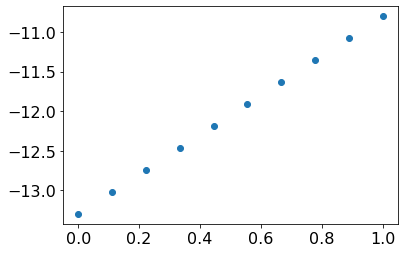

In [4]:
plt.figure()
plt.scatter(X, y)

# least squares solution

In [5]:
#design matrix
A = np.vstack([X**0, X**1]).T

In [6]:
A

array([[1.        , 0.        ],
       [1.        , 0.11111111],
       [1.        , 0.22222222],
       [1.        , 0.33333333],
       [1.        , 0.44444444],
       [1.        , 0.55555556],
       [1.        , 0.66666667],
       [1.        , 0.77777778],
       [1.        , 0.88888889],
       [1.        , 1.        ]])

In [7]:
A.shape

(10, 2)

In [8]:
y.shape

(10,)

In [9]:
a_ls, b_ls = np.linalg.lstsq(A, y, rcond=None)[0]

In [10]:
a_ls, b_ls

(-13.299999999999997, 2.4999999999999947)

# collocation

In [11]:
c0_idx = 1
c1_idx = 5

x0 = X[c0_idx]
x1 = X[c1_idx]

y0 = y[c0_idx]
y1 = y[c1_idx]

In [12]:
A = np.array([[1, x0], [1, x1]])

In [13]:
A

array([[1.        , 0.11111111],
       [1.        , 0.55555556]])

In [14]:
A.shape

(2, 2)

In [15]:
y_target = np.array([y0, y1])

In [16]:
y_target.shape

(2,)

In [17]:
np.linalg.lstsq(A, y_target, rcond=None)[0]

array([-13.3,   2.5])

# more complex example

fit a polynomial with a position and derivative constraint and
compare with least-squares.

We will use a cubic polynomial as our model

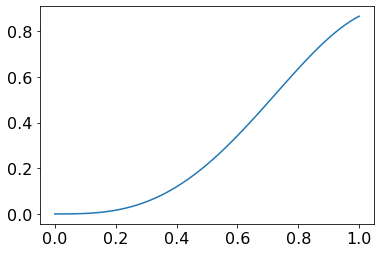

In [18]:
X = np.linspace(0, 1, 100)
y = X**2 * np.sin(2*np.pi*X/3)
plt.plot(X, y)

## least squares

In [19]:
#design matrix
A = np.vstack([X**0, X**1, X**2, X**3]).T

In [20]:
a_ls, b_ls, c_ls, d_ls = np.linalg.lstsq(A, y, rcond=None)[0]

In [21]:
a_ls, b_ls, c_ls, d_ls

(0.028990788155854957,
 -0.5894450323454032,
 2.5032586289871714,
 -1.047779399834487)

In [22]:
yhat_ls = a_ls + b_ls*X + c_ls*X**2 + d_ls*X**3

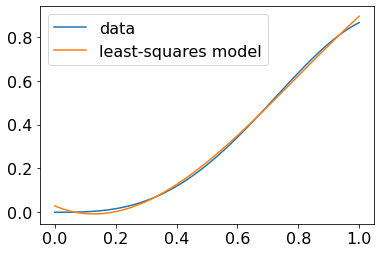

In [23]:
plt.plot(X, y, label='data')
plt.plot(X, yhat_ls, label='least-squares model')
plt.legend()

## collocation

In [24]:
c0_idx = 0
c1_idx = 99



x0 = X[c0_idx]
x1 = X[c1_idx]

y0 = y[c0_idx]
y1 = y[c1_idx]

c2_idx = 50
x2 = X[c2_idx]
y2 = y[c2_idx]

In [25]:
A = np.array([
    [1, x0, x0**2, x0**3],
    [1, 1 , 2*x0 , 3*x0**2],
    [1, x1, x1**2, x1**3],
    [1, x2, x2**2, x2**3],
])

In [26]:
A

array([[1.        , 0.        , 0.        , 0.        ],
       [1.        , 1.        , 0.        , 0.        ],
       [1.        , 1.        , 1.        , 1.        ],
       [1.        , 0.50505051, 0.25507601, 0.12882627]])

In [27]:
y_target = np.array([0, 0, y1, y2])

In [28]:
a_cm, b_cm, c_cm, d_cm = np.linalg.lstsq(A, y_target, rcond=None)[0]

In [29]:
a_cm, b_cm, c_cm, d_cm

(-2.2002421435405313e-16,
 2.7755575615628914e-16,
 0.8766130073720857,
 -0.010587603587646703)

In [30]:
yhat_cm = a_cm + b_cm*X + c_cm*X**2 + d_cm*X**3

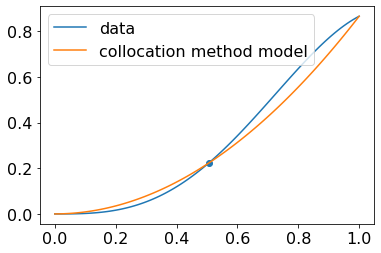

In [31]:
plt.plot(X, y, label='data')
plt.plot(X, yhat_cm, label='collocation method model')

plt.scatter(x2, y2)

plt.legend()

## comparison

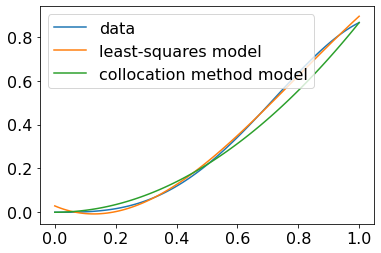

In [32]:
plt.plot(X, y, label='data')
plt.plot(X, yhat_ls, label='least-squares model')
plt.plot(X, yhat_cm, label='collocation method model')
plt.legend()

# vary collocation point to see what kind of predictive distributions we get

In [33]:
def compute_coeffs_ls_and_cm(sigma):
    
    c2_idx = 50
    y2_noise = np.random.normal(0, sigma)
    
    ####
    # ls
    
    A = np.vstack([X**0, X**1, X**2, X**3]).T
    y_ = y.copy()
    y_[c2_idx] = y_[c2_idx] + y2_noise
    a_ls, b_ls, c_ls, d_ls = np.linalg.lstsq(A, y_, rcond=None)[0]
    yhat_ls = a_ls + b_ls*X + c_ls*X**2 + d_ls*X**3
    
    ####
    
    
    ####
    # collocation
    
    c0_idx = 0
    c1_idx = 99

    x0 = X[c0_idx]
    x1 = X[c1_idx]

    y0 = y[c0_idx]
    y1 = y[c1_idx]

    x2 = X[c2_idx]
    y2 = y[c2_idx]
    
    y2 = y2 + y2_noise

    A = np.array([
        [1, x0, x0**2, x0**3],
        [1, 1 , 2*x0 , 3*x0**2],
        [1, x1, x1**2, x1**3],
        [1, x2, x2**2, x2**3],
    ])
    
    y_target = np.array([0, 0, y1, y2])
    
    a_cm, b_cm, c_cm, d_cm = np.linalg.lstsq(A, y_target, rcond=None)[0]
    
    yhat_cm = a_cm + b_cm*X + c_cm*X**2 + d_cm*X**3
    
        ####
    
    return yhat_ls, a_ls, b_ls, c_ls, d_ls, yhat_cm, a_cm, b_cm, c_cm, d_cm, x2, y2

In [34]:
sigma = 0.05
n_tries = 10

yhat_lss = []
a_lss = []
b_lss = []
c_lss = []
d_lss = []


yhat_cms = []
a_cms = []
b_cms = []
c_cms = []
d_cms = []

x2s = []
y2s = []


for i in range(n_tries):
    yhat_ls, a_ls, b_ls, c_ls, d_ls, yhat_cm, a_cm, b_cm, c_cm, d_cm, x2, y2 = compute_coeffs_ls_and_cm(sigma)
    yhat_lss.append(yhat_ls)
    a_lss.append(a_ls)
    b_lss.append(b_ls)
    c_lss.append(c_ls)
    d_lss.append(d_ls)
    yhat_cms.append(yhat_cm)
    a_cms.append(a_cm)
    b_cms.append(b_cm)
    c_cms.append(c_cm)
    d_cms.append(d_cm)
    
    x2s.append(x2)
    y2s.append(y2)
    
yhat_lss = np.array(yhat_lss)
a_lss = np.array(a_lss)
b_lss = np.array(b_lss)
c_lss = np.array(c_lss)
d_lss = np.array(d_lss)

yhat_cms = np.array(yhat_cms)
a_cms = np.array(a_cms)
b_cms = np.array(b_cms)
c_cms = np.array(c_cms)
d_cms = np.array(d_cms)

x2s = np.array(x2s)
y2s = np.array(y2s)

(array([2., 1., 1., 1., 2., 0., 0., 1., 0., 2.]),
 array([0.15557951, 0.16872707, 0.18187463, 0.19502218, 0.20816974,
        0.2213173 , 0.23446485, 0.24761241, 0.26075997, 0.27390753,
        0.28705508]),
 <BarContainer object of 10 artists>)

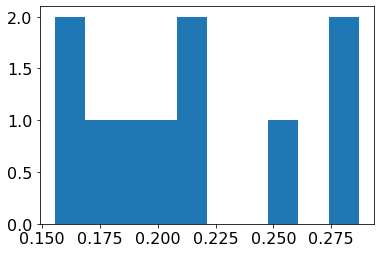

In [35]:
plt.hist(y2s)

Text(0.5, 1.0, 'coeff: d')

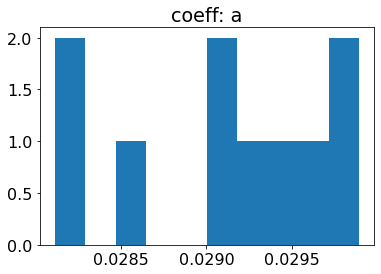

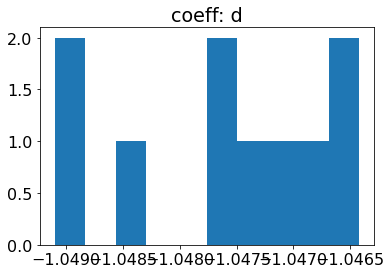

In [36]:
plt.figure()
plt.hist(a_lss);
plt.title("coeff: a")
plt.figure()
plt.hist(b_lss);
plt.title("coeff: b")
plt.figure()
plt.hist(c_lss);
plt.title("coeff: c")
plt.figure()
plt.hist(d_lss);
plt.title("coeff: d")

Text(0.5, 1.0, 'coeff: d')

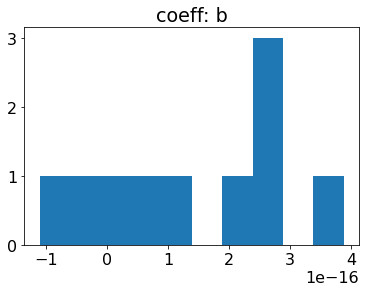

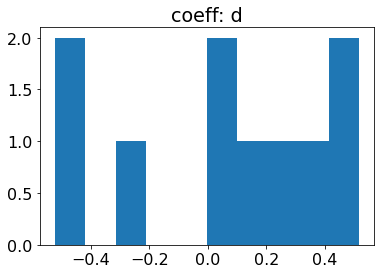

In [37]:
plt.figure()
plt.hist(a_cms);
plt.title("coeff: a")
plt.figure()
plt.hist(b_cms);
plt.title("coeff: b")
plt.figure()
plt.hist(c_cms);
plt.title("coeff: c")
plt.figure()
plt.hist(d_cms);
plt.title("coeff: d")

In [49]:
plt.scatter(c_lss, d_lss)
plt.xlabel("coeff: c")
plt.ylabel("coeff: d")
plt.title("least squares")

Text(0.5, 1.0, 'least squares')

In [44]:
plt.scatter(c_cms, d_cms)
plt.xlabel("coeff: c")
plt.ylabel("coeff: d")
plt.title("collocation")

Text(0.5, 1.0, 'collocation')

In [39]:
plt.plot(X, y, label='data')

for yhat_ls in yhat_lss:
    plt.plot(X, yhat_ls, c='k', alpha=0.5)


plt.scatter(x2s, y2s)
    
plt.legend()
plt.title("least-squares predictions")

Text(0.5, 1.0, 'least-squares predictions')

In [40]:
plt.plot(X, y, label='data')

for yhat_cm in yhat_cms:
    plt.plot(X, yhat_cm, c='k', alpha=0.5)

plt.scatter(x2s, y2s)

plt.legend()
plt.title("collocation method predictions")

Text(0.5, 1.0, 'collocation method predictions')

In [41]:
# the blue dots are realisations of the the perturbed sample.
# in the least-squares method this is basically considered as an outlier and
# is the perturbation is not too large then the resulting best
# fit is not effected very much.

# in the collocation method we have explicitly constrained the model
# to equal the perturbed sample so we can a range of solutions

# which one should we prefer? I think we prefer the collocation method (cm)
# for the following reasons:
# 1. the coefficients are now not only more interpretable (they are the values of the function e.g. amplitude, phase or frequency)
# at specific points in time and the error on these is interpretable and understandable.
# 2. as a by-product of 1. the coefficients tend to me easier to model across the parameter space too.
# 3. we can enforce continuity and smoothness analytically which is important physical feature to include
# 